In [ ]:
#import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.feature_selection import RFE ,RFECV
from sklearn.feature_selection import SelectKBest,SelectPercentile,chi2
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,precision_recall_curve
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split,StratifiedKFold

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving modified_dataframe.csv.csv to modified_dataframe.csv.csv


In [ ]:
data = pd.read_csv('modified_dataframe.csv.csv')  # Replace 'dataset.csv' with the actual file name

In [162]:
data.sort_index()

,Age in 5-year groups,Type of place of residence,Husband/partner education level,educational level,Wealth_index,Number of living children,Entries in birth history,Births in last three years,Contraceptive use and intention,Wanted last child,...,Current_marital_status,Husband partner occupation,Respondent occupation,Getting medical help for self: getting money needed for treatment,Getting medical help for self: getting permission to go,Getting medical help for self: distance to health facility,Number of antenatal visits during pregnancy,adective,terminated pregnancy,media exposure
0,6,2,0,0,1,2,1,1,4,1.000000,...,1,0,0,1.000000,2,1.000000,0,0.0,0,0
1,1,2,0,1,1,0,0,1,4,1.000000,...,0,0,0,1.000000,2,2.000000,0,0.0,0,0
2,5,2,0,0,0,2,1,0,4,1.000000,...,1,1,0,1.000000,2,1.000000,0,0.0,0,0
3,2,2,1,1,0,0,0,1,4,1.000000,...,1,2,0,1.000000,1,1.000000,0,0.0,0,0
4,2,2,1,1,0,0,0,1,4,1.000000,...,1,3,0,1.000000,1,1.000000,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23477,4,2,0,0,1,2,1,0,1,1.000000,...,1,0,1,1.000000,1,1.000000,0,0.0,1,0
23478,5,1,1,0,2,0,0,0,1,1.000000,...,0,8,1,1.156165,2,1.156165,0,0.0,1,1
23479,4,2,0,0,0,1,1,0,1,1.920441,...,1,0,1,1.079559,2,2.000000,0,0.0,1,0
23480,5,1,3,1,2,0,0,0,3,1.000000,...,0,2,0,1.356367,2,2.000000,0,0.0,1,3


In [ ]:
data.drop(['religion', 'region', 'Age at first sex'], axis=1, inplace=True)

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.columns

Index(['Age in 5-year groups', 'Type of place of residence',
       'Husband/partner education level', 'educational level', 'Wealth_index',
       'Number of living children', 'Entries in birth history',
       'Births in last three years', 'Contraceptive use and intention',
       'Wanted last child', 'knowledge of any method',
       'Age of respondent at 1st birth',
       'Did fieldworker talk about family planning',
       'Visited by fieldworker in last 12 months',
       'Visited health facility last 12 ', 'Current_marital_status',
       'Husband partner occupation', 'Respondent occupation',
       'Getting medical help for self: getting money needed for treatment',
       'Getting medical help for self: getting permission to go',
       'Getting medical help for self: distance to health facility',
       'Number of antenatal visits during pregnancy', 'adective',
       'terminated pregnancy', 'media exposure'],
      dtype='object')

In [ ]:
data

""


In [ ]:
data['terminated pregnancy'].value_counts()

0    11741
1    11741
Name: terminated pregnancy, dtype: int64

In [ ]:
x=data.drop(['terminated pregnancy'],axis=1)
y=data['terminated pregnancy']

In [ ]:
#Split the dataset into train and test set
x_train,x_test,y_train,y_test =train_test_split(x,y, test_size=0.2,random_state=0)

In [ ]:
x_train.shape,x_test.shape

((18785, 27), (4697, 27))

In [ ]:


# Continue working with the modified DataFrame as needed


# Stastical and Ranking filter methods

# Mutual Information

In [ ]:
# import the required functions and object.
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
# select the number of features you want to retain.
select_k =12
# get only the numerical features.
numerical_x_train = x_train[x_train.select_dtypes([np.number]).columns]
# create the SelectKBest with the mutual info strategy.
selection = SelectKBest(mutual_info_classif, k=select_k).fit(numerical_x_train, y_train.values.ravel())
# display the retained features.
feat = x_train.columns[selection.get_support()]
print(feat)

Index(['Age in 5-year groups', 'educational level',
       'Births in last three years', 'Wanted last child',
       'Age of respondent at 1st birth',
       'Did fieldworker talk about family planning',
       'Visited by fieldworker in last 12 months',
       'Visited health facility last 12 ',
       'Getting medical help for self: getting money needed for treatment',
       'Getting medical help for self: getting permission to go',
       'Getting medical help for self: distance to health facility',
       'Number of antenatal visits during pregnancy'],
      dtype='object')


In [ ]:
# import mutual_info_classif,SelectKBest,chi2 and select feature using SelectKBest and mutual_info_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest,chi2
best_mi=SelectKBest(score_func=mutual_info_classif,k=12)
fit_skb_mi=best_mi.fit(x_train,y_train.values.ravel())

In [ ]:
# display both best features and their mi scores
mi_scores=pd.DataFrame(fit_skb_mi.scores_)
mi_columns=pd.DataFrame(x_train.columns)

In [ ]:
#concat both features and their mi_scores incase of columns
feat_mi_score=pd.concat([mi_columns,mi_scores],axis=1)

In [ ]:
#display columns and mi scores
feat_mi_score.columns=["mutual_info","scores"]
feat_mi_score

,mutual_info,scores
0,Age in 5-year groups,0.026558
1,Type of place of residence,0.001253
2,Husband/partner education level,0.001959
3,educational level,0.022473
4,Wealth_index,0.006681
5,Number of living children,0.003295
6,Entries in birth history,0.003843
7,Births in last three years,0.014608
8,Contraceptive use and intention,0.005253
9,Wanted last child,0.074763


In [ ]:
# select maximum of the largest 10 features depending upon their mi_scores
f_mi_score=feat_mi_score.nlargest(12,"scores")
f_mi_score

,mutual_info,scores
12,Did fieldworker talk about family planning,0.121152
18,Getting medical help for self: getting money n...,0.116079
20,Getting medical help for self: distance to hea...,0.103306
9,Wanted last child,0.074763
0,Age in 5-year groups,0.026558
3,educational level,0.022473
19,Getting medical help for self: getting permiss...,0.022389
14,Visited health facility last 12,0.017901
7,Births in last three years,0.014608
23,media exposure,0.012248


In [ ]:
#dsiplay best selected features in mi scores
mi_best=x_train.columns[best_mi.get_support()]
mi_best

Index(['Age in 5-year groups', 'educational level',
       'Births in last three years', 'Wanted last child',
       'knowledge of any method', 'Did fieldworker talk about family planning',
       'Visited by fieldworker in last 12 months',
       'Visited health facility last 12 ',
       'Getting medical help for self: getting money needed for treatment',
       'Getting medical help for self: getting permission to go',
       'Getting medical help for self: distance to health facility',
       'media exposure'],
      dtype='object')

In [ ]:
#using the mi_best features,aply the train and test set
x_train_mi_fc=x_train[mi_best]
x_test_mi_fc=x_test[mi_best]

In [ ]:
x_train_mi_fc

,Age in 5-year groups,educational level,Births in last three years,Wanted last child,knowledge of any method,Did fieldworker talk about family planning,Visited by fieldworker in last 12 months,Visited health facility last 12,Getting medical help for self: getting money needed for treatment,Getting medical help for self: getting permission to go,Getting medical help for self: distance to health facility,media exposure
20124,3,0,0,1.0,3,0.000000,0,0,1.000000,1,1.000000,0
1273,7,0,0,1.0,3,1.000000,1,1,1.000000,2,1.000000,1
14388,2,3,1,1.0,3,0.000000,0,0,2.000000,1,1.268320,1
22543,6,1,0,1.0,3,0.000000,0,0,1.000000,1,1.991415,1
22236,2,0,0,1.0,3,1.000000,0,1,1.121660,2,1.878340,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13123,5,1,0,1.0,3,1.000000,0,0,2.000000,2,2.000000,1
19648,4,0,0,1.0,3,0.096577,0,1,1.903423,2,1.096577,3
9845,2,1,1,2.0,3,0.000000,0,0,1.000000,1,1.000000,0
10799,7,0,0,1.0,3,1.000000,1,1,1.000000,1,1.000000,0


In [ ]:
#import model selctiom metrics
from sklearn.model_selection import cross_val_score,KFold,cross_val_predict,cross_validate,GridSearchCV

In [ ]:
#import random forest classifier from sklearn_ensemble
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold
rf_mi=RandomForestClassifier()

In [ ]:
"""grid_search={
        'n_estimators':[100,200,300,400],
         'criterion':['gini','entropy'],
         'bootstrap': [True,False]}
         #'max_depth':list(range(2,16)),
        # 'max_leaf_nodes':[50,70,100]
        #}"""

"grid_search={\n        'n_estimators':[100,200,300,400],\n         'criterion':['gini','entropy'],\n         'bootstrap': [True,False]}\n         #'max_depth':list(range(2,16)),\n        # 'max_leaf_nodes':[50,70,100]\n        #}"

In [ ]:
"""# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
rf_mi_fc = GridSearchCV(estimator = rf, param_grid = grid_search,
                                scoring='accuracy',
                                cv = 10,n_jobs=-1)"""

"# Create a based model\nrf = RandomForestClassifier()\n# Instantiate the grid search model\nrf_mi_fc = GridSearchCV(estimator = rf, param_grid = grid_search,\n                                scoring='accuracy',\n                                cv = 10,n_jobs=-1)"

In [ ]:
"""best_parameters=rf_mi_fc.best_params_
best_parameters"""

'best_parameters=rf_mi_fc.best_params_\nbest_parameters'

In [ ]:
"""best_result=rf_mi_fc.best_score_
best_result"""

'best_result=rf_mi_fc.best_score_\nbest_result'

In [ ]:
import time

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [ ]:

from sklearn.ensemble import RandomForestClassifier

rf_mi_fc=RandomForestClassifier(criterion='entropy',max_features='sqrt',min_samples_split=3,n_estimators=500,random_state=0,max_depth=20, max_leaf_nodes=400, n_jobs=-1)
rf_mi_fc.fit(x_train_mi_fc,y_train.values.ravel())
rf_mi=rf_mi_fc.predict(x_test_mi_fc)
print(metrics.accuracy_score(y_test,rf_mi))

0.8565041515861188


In [ ]:
#using Kfold cross validation n_splits and take the mean accuracy RF in mi classifiers
cv=StratifiedKFold(n_splits=10,shuffle=False)
kfold=cross_val_score(rf_mi_fc,x_train_mi_fc,y_train.values.ravel(),cv=cv)
kf_rf_mi=((kfold.mean()*100))
kf_rf_mi

85.59499053775801

In [ ]:
print(metrics.confusion_matrix(y_test,rf_mi))
print(metrics.classification_report(y_test,rf_mi))

[[2162  179]
 [ 495 1861]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.87      2341
           1       0.91      0.79      0.85      2356

    accuracy                           0.86      4697
   macro avg       0.86      0.86      0.86      4697
weighted avg       0.86      0.86      0.86      4697



In [ ]:
# display accuracy in the form of table for better analysis RF
mix = pd.DataFrame({metrics.accuracy_score(y_test,rf_mi)*100,},
                       index=['rf_mi'],columns=["Accuracy"])
mix

,Accuracy
rf_mi,85.650415


In [ ]:
mi_best

Index(['Age in 5-year groups', 'educational level',
       'Births in last three years', 'Wanted last child',
       'knowledge of any method', 'Did fieldworker talk about family planning',
       'Visited by fieldworker in last 12 months',
       'Visited health facility last 12 ',
       'Getting medical help for self: getting money needed for treatment',
       'Getting medical help for self: getting permission to go',
       'Getting medical help for self: distance to health facility',
       'media exposure'],
      dtype='object')

In [ ]:
#display accuracy only using univariate Feature selction i.e mutual_info_classifiers in both DT and RF
kf_mi1 = pd.DataFrame({kf_rf_mi,},
       index=['rf_mi'],columns=["cv"])
kf_mi1

,cv
rf_mi,85.594991


 Feature Selection using Chi square

In [ ]:
# import the required functions and object.
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
# change this to how much features you want to keep from the top ones.
select_k =12
# apply the chi2 score on the data and target (target should be binary).
selection = SelectKBest(chi2, k=select_k).fit(x_train, y_train.values.ravel())
# display the k selected features.
features = x_train.columns[selection.get_support()]
print(features)

Index(['Age in 5-year groups', 'educational level', 'Wealth_index',
       'Entries in birth history', 'Births in last three years',
       'Visited by fieldworker in last 12 months',
       'Visited health facility last 12 ', 'Current_marital_status',
       'Husband partner occupation',
       'Getting medical help for self: getting permission to go',
       'Number of antenatal visits during pregnancy', 'media exposure'],
      dtype='object')


In [ ]:
from sklearn.feature_selection import SelectKBest,SelectFromModel,chi2
sb_ch=SelectKBest(score_func=chi2,k=12)
sb_fit=sb_ch.fit(x_train,y_train)
ch_scores=pd.DataFrame(sb_fit.scores_)
ch_columns=pd.DataFrame(x_train.columns)

In [ ]:
chi_score=pd.concat([ch_columns,ch_scores],axis=1)

In [ ]:
chi_score.columns=["ch_attributes","scores"]
chi_score

,ch_attributes,scores
0,Age in 5-year groups,606.472237
1,Type of place of residence,8.336476
2,Husband/partner education level,7.801933
3,educational level,659.263854
4,Wealth_index,124.974402
5,Number of living children,32.237478
6,Entries in birth history,49.562250
7,Births in last three years,533.897069
8,Contraceptive use and intention,6.676324
9,Wanted last child,10.018882


In [ ]:
ch_sco=chi_score.nlargest(12,'scores')

In [ ]:
ch_sco

,ch_attributes,scores
3,educational level,659.263854
0,Age in 5-year groups,606.472237
23,media exposure,547.351543
7,Births in last three years,533.897069
13,Visited by fieldworker in last 12 months,280.586201
14,Visited health facility last 12,236.141783
16,Husband partner occupation,233.285670
21,Number of antenatal visits during pregnancy,212.539820
4,Wealth_index,124.974402
19,Getting medical help for self: getting permiss...,56.910391


In [ ]:
chi_best=x_train.columns[sb_fit.get_support()]
chi_best

Index(['Age in 5-year groups', 'educational level', 'Wealth_index',
       'Entries in birth history', 'Births in last three years',
       'Visited by fieldworker in last 12 months',
       'Visited health facility last 12 ', 'Current_marital_status',
       'Husband partner occupation',
       'Getting medical help for self: getting permission to go',
       'Number of antenatal visits during pregnancy', 'media exposure'],
      dtype='object')

In [ ]:
feat_chi = x_train.columns[selection.get_support()]
print(feat_chi)

Index(['Age in 5-year groups', 'educational level', 'Wealth_index',
       'Entries in birth history', 'Births in last three years',
       'Visited by fieldworker in last 12 months',
       'Visited health facility last 12 ', 'Current_marital_status',
       'Husband partner occupation',
       'Getting medical help for self: getting permission to go',
       'Number of antenatal visits during pregnancy', 'media exposure'],
      dtype='object')


In [ ]:
x_train_chi=x_train[chi_best]

In [ ]:
x_test_chi=x_test[chi_best]

In [ ]:
x_train_chi.shape,x_test_chi.shape

((18785, 12), (4697, 12))

In [ ]:
#def run_randomForest(x_train_chi,x_test_chi,y_train,y_test):
from sklearn.ensemble import RandomForestClassifier
rf_chi2=RandomForestClassifier(criterion='entropy',max_features='sqrt',min_samples_split=3,n_estimators=500,random_state=0,max_depth=20, max_leaf_nodes=400, n_jobs=-1)
rf_chi2.fit(x_train_chi,y_train.values.ravel())
rf_chi=rf_chi2.predict(x_test_chi)
print(metrics.accuracy_score(y_test,rf_chi))

0.7602725143708751


In [ ]:
cv=StratifiedKFold(n_splits=10,shuffle=False)
kfold=cross_val_score(rf_chi2,x_train_chi,y_train.values.ravel(),cv=cv)
kf_rf_chi=((kfold.mean()*100))
kf_rf_chi

75.05470757166395

In [ ]:
# dispaly Accuracy in both RF,DT using chi square
chir = pd.DataFrame({ metrics.accuracy_score(y_test,rf_chi)*100,},

       index=['rf_chi'],columns=["Accuracy"])
chir

,Accuracy
rf_chi,76.027251


In [ ]:
x_train_chi.columns

Index(['Age in 5-year groups', 'educational level', 'Wealth_index',
       'Entries in birth history', 'Births in last three years',
       'Visited by fieldworker in last 12 months',
       'Visited health facility last 12 ', 'Current_marital_status',
       'Husband partner occupation',
       'Getting medical help for self: getting permission to go',
       'Number of antenatal visits during pregnancy', 'media exposure'],
      dtype='object')

In [ ]:
# display KFold cv with DT,RF in chi2
kf_chi13 = pd.DataFrame({kf_rf_chi,},
       index=['rf_chi'],columns=["cv"])
kf_chi13

,cv
rf_chi,75.054708


Features selection using f_classif

In [ ]:
# import the required functions and object.
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
# select the number of features you want to retain.
select_k = 12
# create the SelectKBest with the mutual info strategy.
selection = SelectKBest(f_classif, k=select_k).fit(x_train, y_train.values.ravel())
# display the retained features.
fc_best = x_train.columns[selection.get_support()]
print(fc_best)

Index(['Age in 5-year groups', 'educational level', 'Wealth_index',
       'Births in last three years',
       'Visited by fieldworker in last 12 months',
       'Visited health facility last 12 ', 'Current_marital_status',
       'Husband partner occupation',
       'Getting medical help for self: getting money needed for treatment',
       'Getting medical help for self: getting permission to go',
       'Number of antenatal visits during pregnancy', 'media exposure'],
      dtype='object')


In [ ]:
fc_best

Index(['Age in 5-year groups', 'educational level', 'Wealth_index',
       'Births in last three years',
       'Visited by fieldworker in last 12 months',
       'Visited health facility last 12 ', 'Current_marital_status',
       'Husband partner occupation',
       'Getting medical help for self: getting money needed for treatment',
       'Getting medical help for self: getting permission to go',
       'Number of antenatal visits during pregnancy', 'media exposure'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
f_class=SelectKBest(score_func=f_classif,k=12)
f_class=f_class.fit(x_train,y_train.values.ravel())
fc_scores=pd.DataFrame(f_class.scores_)
fc_columns=pd.DataFrame(x_train.columns)

In [ ]:
# display the retained features.
fc_best = x_train.columns[f_class.get_support()]
print(fc_best)

Index(['Age in 5-year groups', 'educational level', 'Wealth_index',
       'Births in last three years',
       'Visited by fieldworker in last 12 months',
       'Visited health facility last 12 ', 'Current_marital_status',
       'Husband partner occupation',
       'Getting medical help for self: getting money needed for treatment',
       'Getting medical help for self: getting permission to go',
       'Number of antenatal visits during pregnancy', 'media exposure'],
      dtype='object')


In [ ]:
x_train_fc=x_train[fc_best]
x_test_fc=x_test[fc_best]

In [ ]:
x_train_fc.shape,x_test_fc.shape

((18785, 12), (4697, 12))

In [ ]:
f_class_score=pd.concat([fc_columns,fc_scores],axis=1)

In [ ]:
f_class_score.columns=["f_classif","scores"]
f_class_score

,f_classif,scores
0,Age in 5-year groups,839.141216
1,Type of place of residence,54.585396
2,Husband/partner education level,6.524926
3,educational level,580.857309
4,Wealth_index,189.792524
5,Number of living children,30.129782
6,Entries in birth history,55.125675
7,Births in last three years,709.965091
8,Contraceptive use and intention,14.122905
9,Wanted last child,50.716786


In [ ]:
f_cl=f_class_score.nlargest(12,'scores')

In [ ]:
f_cl

,f_classif,scores
0,Age in 5-year groups,839.141216
9,Births in last three years,709.965091
4,educational level,580.857309
16,Visited health facility last 12,479.982595
15,Visited by fieldworker in last 12 months,436.700159
22,Getting medical help for self: getting permiss...,367.505567
26,media exposure,296.000722
24,Number of antenatal visits during pregnancy,192.014811
6,Wealth_index,189.792524
17,Current_marital_status,179.968180


In [ ]:
f_best=x_train.columns[f_class.get_support()]
f_best

Index(['Age in 5-year groups', 'educational level', 'Wealth_index',
       'Births in last three years',
       'Visited by fieldworker in last 12 months',
       'Visited health facility last 12 ', 'Current_marital_status',
       'Husband partner occupation',
       'Getting medical help for self: getting money needed for treatment',
       'Getting medical help for self: getting permission to go',
       'Number of antenatal visits during pregnancy', 'media exposure'],
      dtype='object')

In [ ]:
#def run_randomForest(x_train_fc,x_test_fc,y_train,y_test):
from sklearn.ensemble import RandomForestClassifier
rf_fcc=RandomForestClassifier(criterion='entropy',max_features='sqrt',min_samples_split=3,n_estimators=500,random_state=0,max_depth=20, max_leaf_nodes=400, n_jobs=-1)
rf_fcc.fit(x_train_fc,y_train.values.ravel())
rf_fc=rf_fcc.predict(x_test_fc)
print(metrics.accuracy_score(y_test,rf_fc))

0.8007238662976368


In [ ]:
cv=StratifiedKFold(n_splits=10,shuffle=False)
kfold=cross_val_score(rf_fcc,x_train_fc,y_train.values.ravel(),cv=cv)
kf_rf_fc=((kfold.mean()*100))
kf_rf_fc

78.64796208982074

In [ ]:
#display accuracy in DT,RF with fclassifiers
fcrf= pd.DataFrame({metrics.accuracy_score(y_test,rf_fc)*100,},

       index=['rf_fc'],columns=["Accuracy"])
fcrf

,Accuracy
rf_fc,80.072387


In [ ]:
x_train_fc.shape,x_test_fc.shape

((18785, 10), (4697, 10))

In [ ]:
# call best features in mutual_info_classifiers
mi_best

Index(['Age in 5-year groups', 'educational level',
       'Births in last three years', 'Wanted last child',
       'knowledge of any method', 'Did fieldworker talk about family planning',
       'Visited by fieldworker in last 12 months',
       'Visited health facility last 12 ',
       'Getting medical help for self: getting money needed for treatment',
       'Getting medical help for self: getting permission to go',
       'Getting medical help for self: distance to health facility',
       'media exposure'],
      dtype='object')

In [ ]:
## call best features in chi-square
chi_best

Index(['Age in 5-year groups', 'educational level', 'Wealth_index',
       'Entries in birth history', 'Births in last three years',
       'Visited by fieldworker in last 12 months',
       'Visited health facility last 12 ', 'Current_marital_status',
       'Husband partner occupation',
       'Getting medical help for self: getting permission to go',
       'Number of antenatal visits during pregnancy', 'media exposure'],
      dtype='object')

In [ ]:
## call best features in fclassifiers
f_best

Index(['Age in 5-year groups', 'educational level', 'Wealth_index',
       'Births in last three years',
       'Visited by fieldworker in last 12 months',
       'Visited health facility last 12 ', 'Current_marital_status',
       'Husband partner occupation',
       'Getting medical help for self: getting money needed for treatment',
       'Getting medical help for self: getting permission to go',
       'Number of antenatal visits during pregnancy', 'media exposure'],
      dtype='object')

In [ ]:
##call accuracy using fclassifiers
fc

NameError: name 'fc' is not defined

## Feature Importances

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# create the random forest with your hyperparameters.
model = RandomForestClassifier(criterion='entropy',max_features='sqrt',min_samples_split=3,n_estimators=500,random_state=0,max_depth=20, max_leaf_nodes=400, n_jobs=-1)
# fit the model to start training.
model.fit(x_train, y_train.values.ravel())
# get the importance of the resulting features.
importances = model.feature_importances_
# create a data frame for visualization.
final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
final_df.set_index('Importances')
# sort in ascending order to better visualization.
final_df = final_df.sort_values('Importances')


In [ ]:
importance=final_df.nlargest(12,'Importances')
importance

,Features,Importances
12,Did fieldworker talk about family planning,0.157604
18,Getting medical help for self: getting money n...,0.140865
20,Getting medical help for self: distance to hea...,0.124007
0,Age in 5-year groups,0.077520
3,educational level,0.050268
9,Wanted last child,0.050129
7,Births in last three years,0.048657
16,Husband partner occupation,0.035777
8,Contraceptive use and intention,0.028910
17,Respondent occupation,0.028764


In [ ]:
imp_score=pd.DataFrame(final_df)

In [ ]:
imp_score

,Features,Importances
25,adective,0.001065
12,knowledge of any method,0.004517
24,Number of antenatal visits during pregnancy,0.009414
8,Entries in birth history,0.011279
17,Current_marital_status,0.011531
6,Wealth_index,0.014380
7,Number of living children,0.015760
22,Getting medical help for self: getting permiss...,0.016093
13,Age of respondent at 1st birth,0.016125
2,Type of place of residence,0.017679


In [ ]:
#mi_best=mutual info classifaction
#chi_best= best feature using chi square
#f_best=best feature using f_classif
df = pd.DataFrame({'mi_best': mi_best,
           'chi_best':chi_best,
            'f_best':f_best},
       columns=['mi_best', 'chi_best', 'f_best'])
df

,mi_best,chi_best,f_best
0,Age in 5-year groups,Age in 5-year groups,Age in 5-year groups
1,educational level,educational level,educational level
2,Births in last three years,Wealth_index,Wealth_index
3,Wanted last child,Entries in birth history,Births in last three years
4,knowledge of any method,Births in last three years,Visited by fieldworker in last 12 months
5,Did fieldworker talk about family planning,Visited by fieldworker in last 12 months,Visited health facility last 12
6,Visited by fieldworker in last 12 months,Visited health facility last 12,Current_marital_status
7,Visited health facility last 12,Current_marital_status,Husband partner occupation
8,Getting medical help for self: getting money n...,Husband partner occupation,Getting medical help for self: getting money n...
9,Getting medical help for self: getting permiss...,Getting medical help for self: getting permiss...,Getting medical help for self: getting permiss...


In [ ]:
data=df.to_csv("C:/Users/Bel_Z_Man/Desktop/filter.csv")

In [ ]:
score=pd.concat([mi_columns,mi_scores,ch_columns,ch_scores,fc_columns,fc_scores,imp_score],axis=1)

In [ ]:
score.columns=['mut_info_att','mut_info_attr_score','chi_attr','chi_attr_score','fclass_attr','fclass_attr_score','importance','imp_score']
score

,mut_info_att,mut_info_attr_score,chi_attr,chi_attr_score,fclass_attr,fclass_attr_score,importance,imp_score
0,Age in 5-year groups,0.026558,Age in 5-year groups,606.472237,Age in 5-year groups,839.141216,Age in 5-year groups,0.077520
1,Type of place of residence,0.001253,Type of place of residence,8.336476,Type of place of residence,54.585396,Type of place of residence,0.021443
2,Husband/partner education level,0.001959,Husband/partner education level,7.801933,Husband/partner education level,6.524926,Husband/partner education level,0.027286
3,educational level,0.022473,educational level,659.263854,educational level,580.857309,educational level,0.050268
4,Wealth_index,0.006681,Wealth_index,124.974402,Wealth_index,189.792524,Wealth_index,0.017643
5,Number of living children,0.003295,Number of living children,32.237478,Number of living children,30.129782,Number of living children,0.019683
6,Entries in birth history,0.003843,Entries in birth history,49.562250,Entries in birth history,55.125675,Entries in birth history,0.014099
7,Births in last three years,0.014608,Births in last three years,533.897069,Births in last three years,709.965091,Births in last three years,0.048657
8,Contraceptive use and intention,0.005253,Contraceptive use and intention,6.676324,Contraceptive use and intention,14.122905,Contraceptive use and intention,0.028910
9,Wanted last child,0.074763,Wanted last child,10.018882,Wanted last child,50.716786,Wanted last child,0.050129


In [ ]:
print(score.nlargest(12,['mut_info_attr_score']))

                                         mut_info_att  mut_info_attr_score  \
12         Did fieldworker talk about family planning             0.121152   
18  Getting medical help for self: getting money n...             0.116079   
20  Getting medical help for self: distance to hea...             0.103306   
9                                   Wanted last child             0.074763   
0                                Age in 5-year groups             0.026558   
3                                   educational level             0.022473   
19  Getting medical help for self: getting permiss...             0.022389   
14                   Visited health facility last 12              0.017901   
7                          Births in last three years             0.014608   
23                                     media exposure             0.012248   
10                            knowledge of any method             0.011637   
13           Visited by fieldworker in last 12 months           

In [ ]:
best_attributes=pd.concat([f_mi_score,ch_sco,f_cl,importance],axis=1)
best_attributes.fillna("")

,mutual_info,scores,ch_attributes,scores,f_classif,scores,Features,Importances
12,Did fieldworker talk about family planning,0.121152,,,,,Did fieldworker talk about family planning,0.157604
18,Getting medical help for self: getting money n...,0.116079,,,Getting medical help for self: getting money n...,56.34163,Getting medical help for self: getting money n...,0.140865
20,Getting medical help for self: distance to hea...,0.103306,,,,,Getting medical help for self: distance to hea...,0.124007
9,Wanted last child,0.074763,,,,,Wanted last child,0.050129
0,Age in 5-year groups,0.026558,Age in 5-year groups,606.472237,Age in 5-year groups,839.141216,Age in 5-year groups,0.07752
3,educational level,0.022473,educational level,659.263854,educational level,580.857309,educational level,0.050268
19,Getting medical help for self: getting permiss...,0.022389,Getting medical help for self: getting permiss...,56.910391,Getting medical help for self: getting permiss...,367.505567,,
14,Visited health facility last 12,0.017901,Visited health facility last 12,236.141783,Visited health facility last 12,479.982595,,
7,Births in last three years,0.014608,Births in last three years,533.897069,Births in last three years,709.965091,Births in last three years,0.048657
23,media exposure,0.012248,media exposure,547.351543,media exposure,296.000722,media exposure,0.027856


In [ ]:
importance=final_df.nlargest(12,'Importances')
importance

,Features,Importances
12,Did fieldworker talk about family planning,0.157604
18,Getting medical help for self: getting money n...,0.140865
20,Getting medical help for self: distance to hea...,0.124007
0,Age in 5-year groups,0.077520
3,educational level,0.050268
9,Wanted last child,0.050129
7,Births in last three years,0.048657
16,Husband partner occupation,0.035777
8,Contraceptive use and intention,0.028910
17,Respondent occupation,0.028764


Univariate ROC-AUC /RMSE

In [ ]:
all_merged.corr(method="spearman")['v457'].sort_values(ascending=False)# dispay correlation ascending orders

v457         1.000000
v190         0.208280
v717         0.198923
v701         0.174031
h34          0.149647
v159         0.143854
v106         0.128358
m45          0.102662
h10          0.087916
m15          0.087824
h11          0.083262
v157         0.078859
v459         0.078155
v013         0.071618
v158         0.070004
v445         0.060310
v705         0.057194
v116         0.036682
v228         0.022971
m49a         0.016605
v136         0.009949
v224         0.008657
addiction    0.000639
v404        -0.018503
v501        -0.024357
v225        -0.065565
v027        -0.068122
v025        -0.091969
v214        -0.093024
v113        -0.095701
v024        -0.124349
v364        -0.165489
v130        -0.264699
Name: v457, dtype: float64

In [ ]:
importance=final_df.nlargest(16,'Importances')
importance


,Features,Importances
1,v024,0.132462
0,v013,0.099983
12,v214,0.061799
7,v130,0.056221
23,v705,0.054289
24,v717,0.052794
13,v224,0.048803
31,v190,0.045992
8,v136,0.044347
10,v158,0.042967


In [ ]:
x_train.shape,x_test.shape

((23283, 32), (5821, 32))

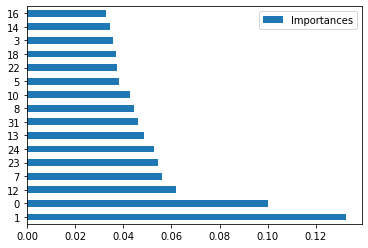

In [ ]:
importance.plot.barh()

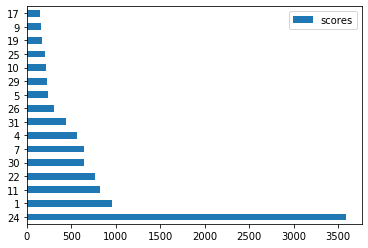

In [ ]:
ch_sco.plot.barh()

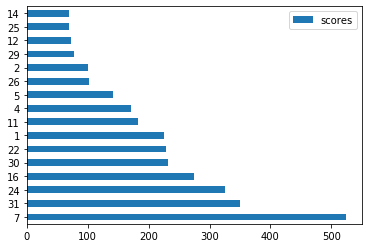

In [ ]:
f_cl.plot.barh()

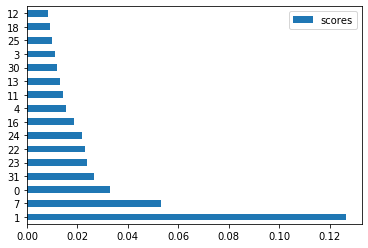

In [ ]:
f_mi_score.plot.barh()

Correlation Matrix with Heatmap

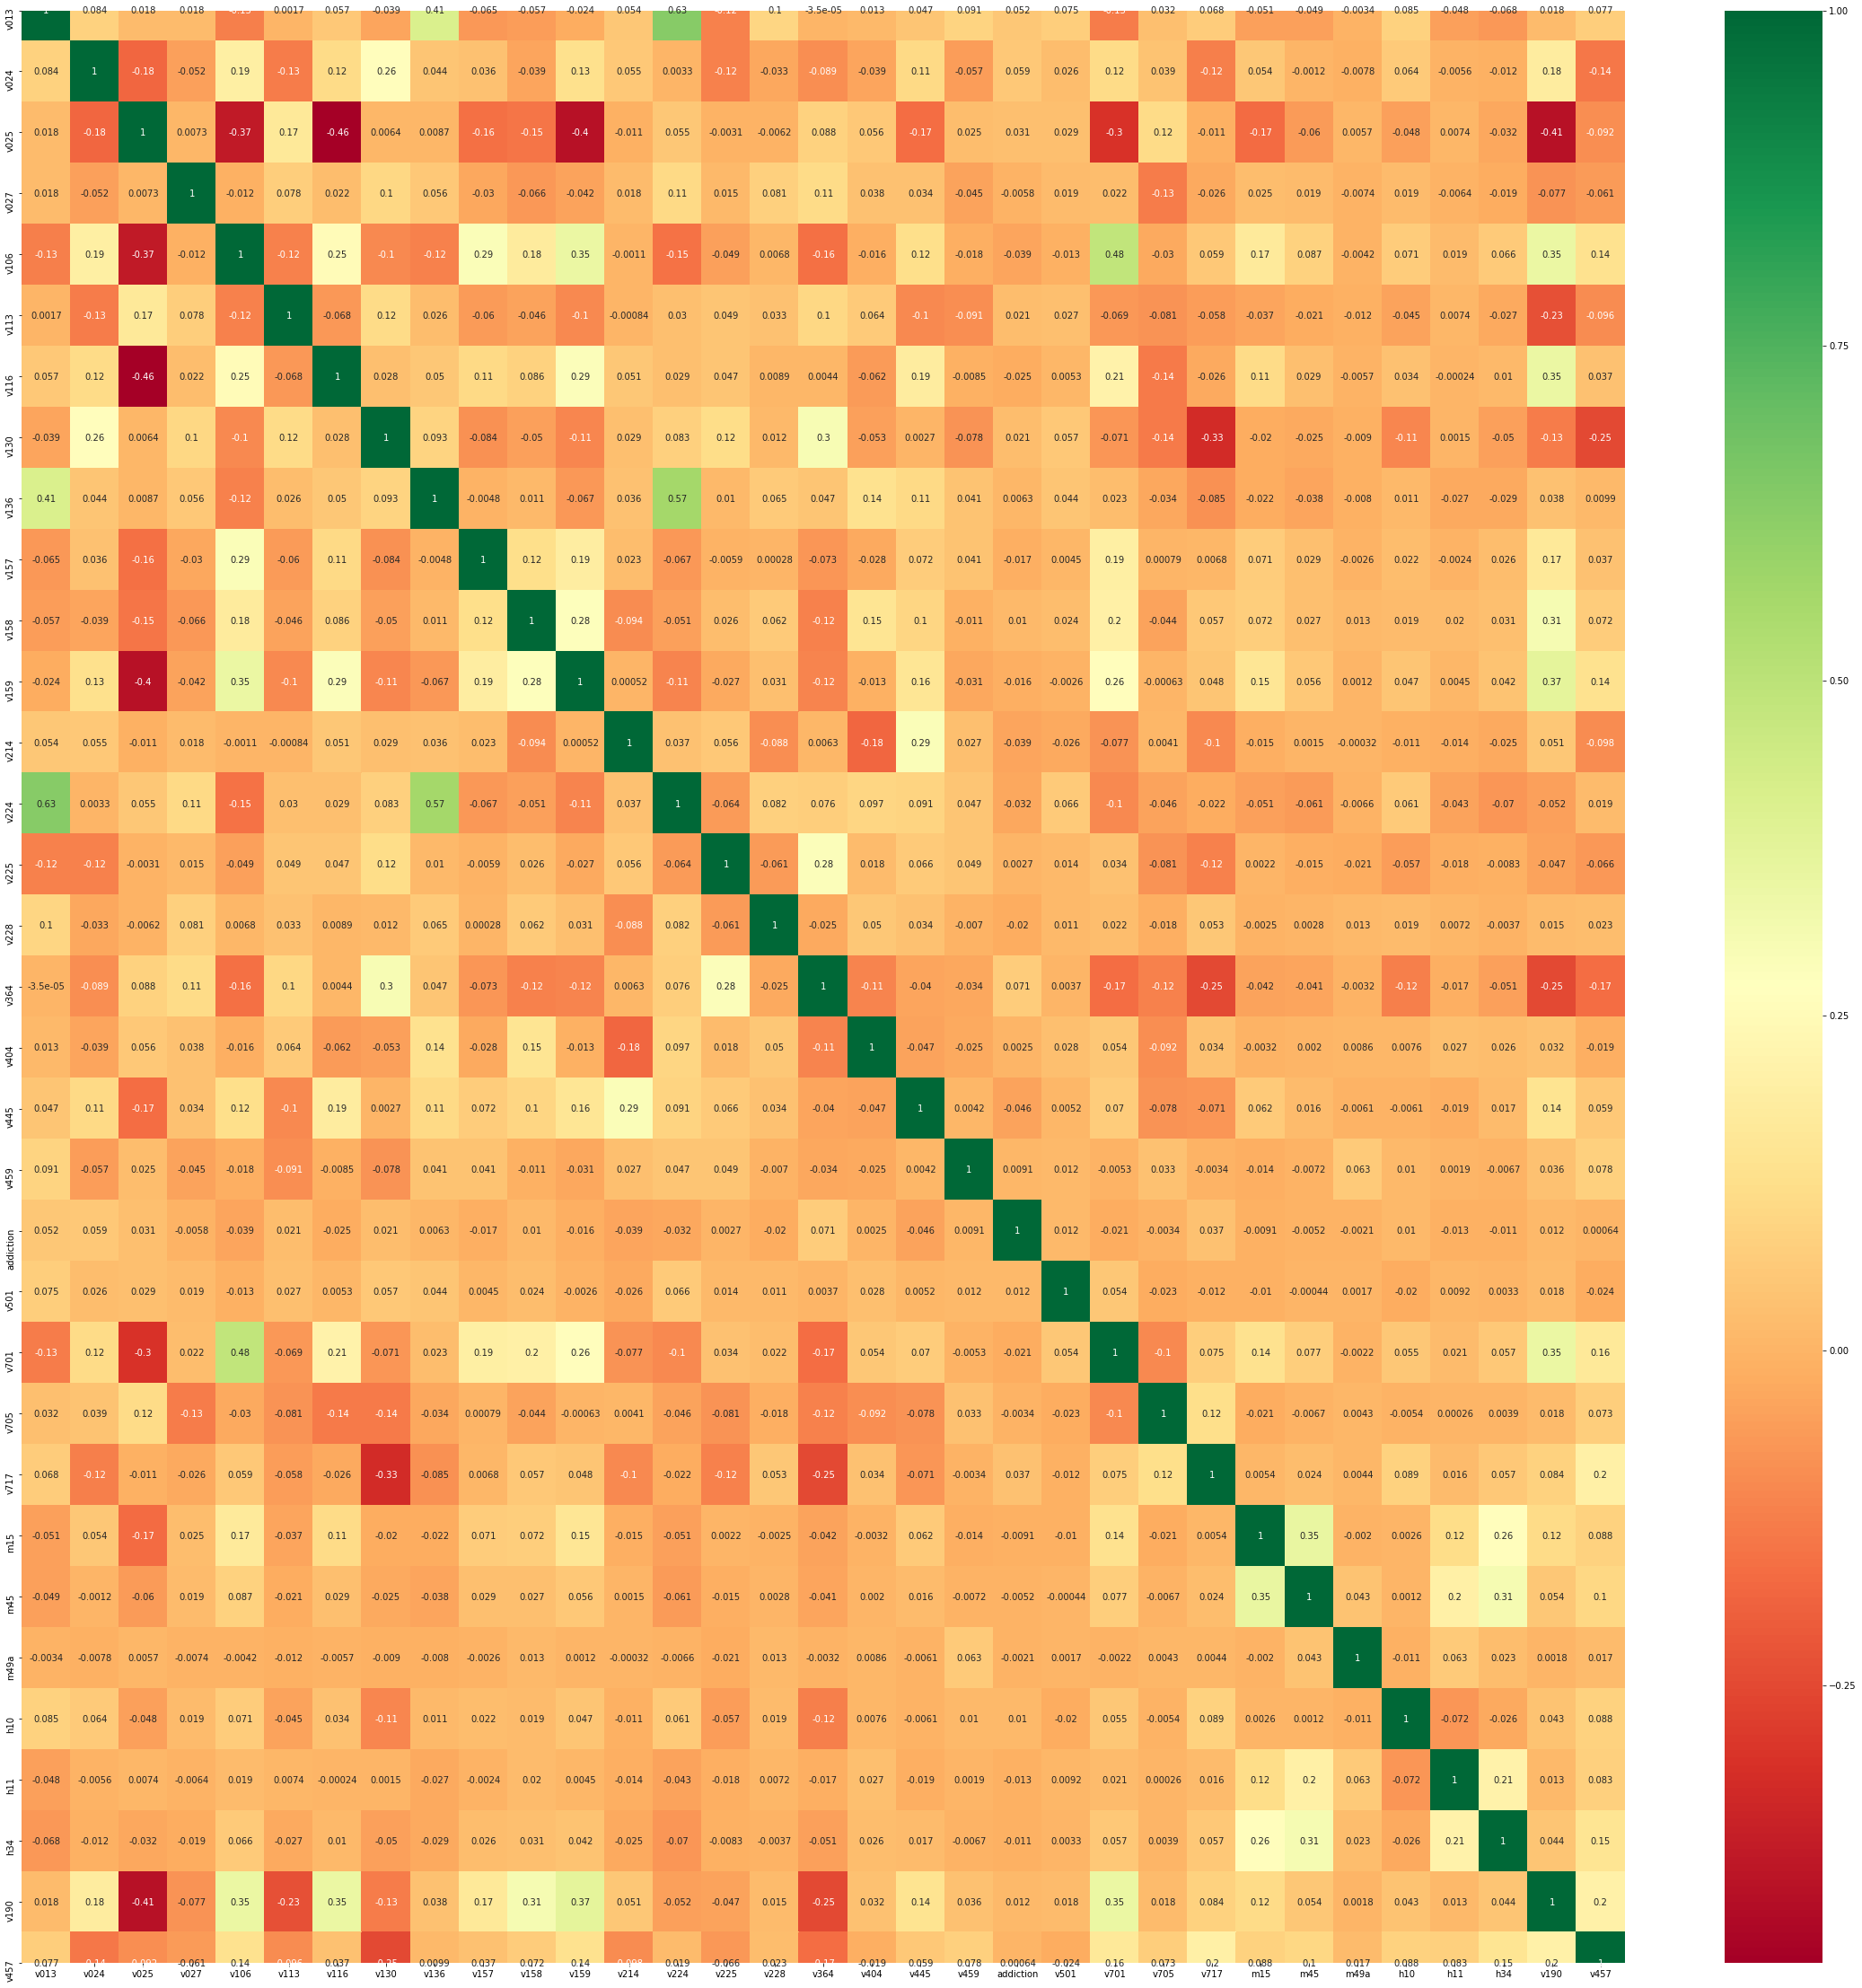

In [ ]:
import seaborn as sns
cormatx=all_merged.corr(method="spearman")
top_corr_features=cormatx.index
plt.figure(figsize=(40,40))
corr_heatmap=sns.heatmap(all_merged[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.savefig("visualzation.png")

In [ ]:
from sklearn.feature_selection import SelectFromModel
clf =SelectFromModel(RandomForestClassifier(criterion='entropy',max_features='sqrt',min_samples_split=3,n_estimators=500,random_state=0,max_depth=20, max_leaf_nodes=400, n_jobs=-1))
# Train the classifier
clf.fit(x_train, y_train.values.ravel())
clf.get_support()
selected_feat=x_train.columns[(clf.get_support())]
print("number of features:",len(selected_feat))
print()
print("selected features :",selected_feat)

# Print the name and gini importance of each feature
#for feature in zip(x_train.columns, clf.feature_importances_):
 #   print(feature)

number of features: 16

selected features : Index(['v013', 'v024', 'v027', 'v113', 'v130', 'v136', 'v158', 'v214', 'v224',
       'v225', 'v364', 'v445', 'v701', 'v705', 'v717', 'v190'],
      dtype='object')


In [ ]:
selected_feat

Index(['v013', 'v024', 'v027', 'v113', 'v130', 'v136', 'v158', 'v214', 'v224',
       'v225', 'v364', 'v445', 'v701', 'v705', 'v717', 'v190'],
      dtype='object')

In [ ]:
x_train_rf=x_train[selected_feat]
x_test_rf=x_test[selected_feat]

In [ ]:
x_train_rf.shape,x_test_rf.shape

((23283, 16), (5821, 16))

In [ ]:
#def run_randomForest(x_train_fc,x_test_fc,y_train,y_test):
from sklearn.ensemble import RandomForestClassifier
rf__=RandomForestClassifier(criterion='entropy',max_features='sqrt',min_samples_split=3,n_estimators=500,random_state=0,max_depth=20, max_leaf_nodes=400, n_jobs=-1)
rf__=rf__.fit(x_train_rf,y_train.values.ravel())
rf_=rf__.predict(x_test_rf)
print(metrics.accuracy_score(y_test,rf_))

0.9216629445112524


In [ ]:
cv=StratifiedKFold(n_splits=10,shuffle=False)
kfold=cross_val_score(rf__,x_train_rf,y_train.values.ravel(),cv=cv)
kf_rfe_=((kfold.mean()*100))
kf_rfe_

91.81375500008116

#### Wrapper Feature selction methods

Library to install

In [ ]:
pip "install mlxtend"

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "install mlxtend" - maybe you meant "install"



Forward Feature Selection
Also known as step forward feature selection (or sequential forward feature selection — SFS), this is an iterative method in which we start by evaluating all features individually, and then select the one that results in the best performance.

In [ ]:
#pip install mlxtend

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

k_features: The maximum feature to be reached when starting from 0.
forward: Use step forward or step backward feature selection.
floating: step floating forward selection.
scoring: evaluate model performance
cv: The number of folds of K-fold cross-validation

In [ ]:
# create the SequentialFeatureSelector object, and configure the parameters.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sfs = SFS(RandomForestClassifier(criterion='entropy',max_features='sqrt',min_samples_split=3,n_estimators=500,random_state=0,max_depth=20, max_leaf_nodes=400, n_jobs=-1),
           k_features=12,
           forward=True,
           floating=False,
           scoring='accuracy',
           cv=3)

In [ ]:
# fit the object to the training data.
sfs = sfs.fit(x_train,y_train.values.ravel())

In [ ]:
# print the selected features.
sfs_featueres = x_train.columns[list(sfs.k_feature_idx_)]
print(sfs_featueres)

Index(['Age in 5-year groups', 'Type of place of residence',
       'educational level', 'Entries in birth history',
       'Births in last three years', 'Contraceptive use and intention',
       'Wanted last child', 'Did fieldworker talk about family planning',
       'Visited health facility last 12 ', 'Husband partner occupation',
       'Getting medical help for self: getting money needed for treatment',
       'Getting medical help for self: distance to health facility'],
      dtype='object')


In [164]:
# print the final prediction score.
print(sfs.k_score_)
# transform to the newly selected features.
x_train_sfs = sfs.transform(x_train)
x_test_sfs = sfs.transform(x_test)

0.8660634978594386


In [ ]:
x_train_sfs.shape,x_test_sfs.shape

((18785, 12), (4697, 12))

In [ ]:
x_train_sfs

array([[3.       , 2.       , 0.       , ..., 0.       , 1.       ,
        1.       ],
       [7.       , 2.       , 0.       , ..., 0.       , 1.       ,
        1.       ],
       [2.       , 1.       , 3.       , ..., 5.       , 2.       ,
        1.2683204],
       ...,
       [2.       , 2.       , 1.       , ..., 0.       , 1.       ,
        1.       ],
       [7.       , 2.       , 0.       , ..., 0.       , 1.       ,
        1.       ],
       [2.       , 2.       , 1.       , ..., 0.       , 1.       ,
        2.       ]])

In [ ]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(12,)","[0.655381667198978, 0.652666879591185, 0.65884...",0.65563,"(Did fieldworker talk about family planning,)",0.005685,0.002526,0.001786
2,"(12, 20)","[0.7425742574257426, 0.7411370169274992, 0.742...",0.742081,"(Did fieldworker talk about family planning, G...",0.001503,0.000668,0.000472
3,"(12, 18, 20)","[0.796550622804216, 0.7903225806451613, 0.7965...",0.794464,"(Did fieldworker talk about family planning, G...",0.00659,0.002928,0.002071
4,"(9, 12, 18, 20)","[0.8166719897796231, 0.8117214947301181, 0.819...",0.815864,"(Wanted last child, Did fieldworker talk about...",0.006988,0.003105,0.002196
5,"(8, 9, 12, 18, 20)","[0.8201852443308847, 0.8144362823379112, 0.821...",0.818685,"(Contraceptive use and intention, Wanted last ...",0.006858,0.003047,0.002155
6,"(3, 8, 9, 12, 18, 20)","[0.8203449377195784, 0.8203449377195784, 0.826...",0.822465,"(educational level, Contraceptive use and inte...",0.006747,0.002998,0.00212
7,"(3, 8, 9, 12, 14, 18, 20)","[0.8243372724369211, 0.8278505269881827, 0.835...",0.829173,"(educational level, Contraceptive use and inte...",0.010316,0.004584,0.003241
8,"(3, 8, 9, 12, 14, 16, 18, 20)","[0.8363142765889492, 0.8404663046949856, 0.843...",0.840032,"(educational level, Contraceptive use and inte...",0.006469,0.002875,0.002033
9,"(0, 3, 8, 9, 12, 14, 16, 18, 20)","[0.8487703609070585, 0.8489300542957522, 0.853...",0.850466,"(Age in 5-year groups, educational level, Cont...",0.005144,0.002286,0.001616
10,"(0, 3, 7, 8, 9, 12, 14, 16, 18, 20)","[0.853401469179176, 0.8559565633982753, 0.8634...",0.857599,"(Age in 5-year groups, educational level, Birt...",0.009586,0.00426,0.003012


In [ ]:
# just set forward=False for backward feature selection.
# create theSequentialFeatureSelector object, and configure the parameters.
from mlxtend.feature_selection import SequentialFeatureSelector
# import the algorithm you want to evaluate on your features.
from sklearn.ensemble import RandomForestClassifier
sbs = SequentialFeatureSelector(RandomForestClassifier(criterion='entropy',max_features='sqrt',min_samples_split=3,n_estimators=500,random_state=0,max_depth=20, max_leaf_nodes=400, n_jobs=-1),
           k_features=12,
           forward=False,
           floating=False,
           scoring='accuracy',
           cv=3)

In [157]:
# fit the object to our training data.
sbs = sbs.fit(x_train, y_train.values.ravel())

In [158]:
# print the selected features.
sbs_features = x_train.columns[list(sbs.k_feature_idx_)]
print(sbs_features)

Index(['Age in 5-year groups', 'Husband/partner education level',
       'Births in last three years', 'Contraceptive use and intention',
       'Wanted last child', 'Did fieldworker talk about family planning',
       'Visited by fieldworker in last 12 months', 'Respondent occupation',
       'Getting medical help for self: getting money needed for treatment',
       'Getting medical help for self: getting permission to go',
       'Getting medical help for self: distance to health facility',
       'media exposure'],
      dtype='object')


In [159]:
# print the final prediction score.
print(sbs.k_score_)

0.8684589667059818


In [160]:
#transform to the newly selected features.
x_train_sbs = sbs.transform(x_train)
x_test_sbs = sbs.transform(x_test)

In [163]:
pd.DataFrame.from_dict(sbs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
24,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8773554774832322, 0.8811881188118812, 0.888...",0.882513,"(Age in 5-year groups, Type of place of reside...",0.010899,0.004843,0.003425
23,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.8823059725327371, 0.8837432130309805, 0.887...",0.884642,"(Age in 5-year groups, Type of place of reside...",0.005315,0.002362,0.00167
22,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.8837432130309805, 0.8811881188118812, 0.890...",0.885015,"(Age in 5-year groups, Type of place of reside...",0.008446,0.003753,0.002654
21,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...","[0.8850207601405302, 0.8824656659214308, 0.888...",0.885494,"(Age in 5-year groups, Type of place of reside...",0.006046,0.002687,0.0019
20,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15...","[0.8835835196422868, 0.881826892366656, 0.8881...",0.884536,"(Age in 5-year groups, Type of place of reside...",0.006045,0.002686,0.001899
19,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16...","[0.8864580006387736, 0.8823059725327371, 0.887...",0.885441,"(Age in 5-year groups, Type of place of reside...",0.005089,0.002262,0.001599
18,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 17...","[0.8853401469179176, 0.8810284254231875, 0.886...",0.884163,"(Age in 5-year groups, Type of place of reside...",0.005039,0.002239,0.001583
17,"(0, 1, 2, 4, 5, 7, 8, 9, 11, 12, 13, 15, 17, 1...","[0.8837432130309805, 0.880229958479719, 0.8865...",0.883524,"(Age in 5-year groups, Type of place of reside...",0.005862,0.002605,0.001842
16,"(0, 1, 2, 4, 5, 7, 8, 9, 11, 12, 13, 17, 18, 1...","[0.8821462791440434, 0.8781539444267007, 0.883...",0.881182,"(Age in 5-year groups, Type of place of reside...",0.004923,0.002188,0.001547
15,"(0, 1, 2, 5, 7, 8, 9, 11, 12, 13, 17, 18, 19, ...","[0.8775151708719259, 0.8740019163206644, 0.881...",0.877615,"(Age in 5-year groups, Type of place of reside...",0.006733,0.002992,0.002116


In [165]:
x_train_sbs

array([[3.       , 0.       , 0.       , ..., 1.       , 1.       ,
        0.       ],
       [7.       , 0.       , 0.       , ..., 2.       , 1.       ,
        1.       ],
       [2.       , 3.       , 1.       , ..., 1.       , 1.2683204,
        1.       ],
       ...,
       [2.       , 0.       , 1.       , ..., 1.       , 1.       ,
        0.       ],
       [7.       , 0.       , 0.       , ..., 1.       , 1.       ,
        0.       ],
       [2.       , 2.       , 1.       , ..., 1.       , 2.       ,
        0.       ]])

In [166]:
SFS = pd.DataFrame({'SFFS': sfs_featueres,

                 'SBFS':sbs_features,
                  },
       columns=['SFFS','SBFS'])
SFS

,SFFS,SBFS
0,Age in 5-year groups,Age in 5-year groups
1,Type of place of residence,Husband/partner education level
2,educational level,Births in last three years
3,Entries in birth history,Contraceptive use and intention
4,Births in last three years,Wanted last child
5,Contraceptive use and intention,Did fieldworker talk about family planning
6,Wanted last child,Visited by fieldworker in last 12 months
7,Did fieldworker talk about family planning,Respondent occupation
8,Visited health facility last 12,Getting medical help for self: getting money n...
9,Husband partner occupation,Getting medical help for self: getting permiss...


In [167]:
SFS_scores = pd.DataFrame({'SFFS':sfs.k_score_,
                   'SBFS':sbs.k_score_},
       columns=['SFFS','SBFS'],index=["Acc:SFS"])
SFS_scores

,SFFS,SBFS
Acc:SFS,0.866063,0.868459


In [168]:
wrapper_SFS=pd.concat([SFS,SFS_scores])
wrapper_SFS

,SFFS,SBFS
0,Age in 5-year groups,Age in 5-year groups
1,Type of place of residence,Husband/partner education level
2,educational level,Births in last three years
3,Entries in birth history,Contraceptive use and intention
4,Births in last three years,Wanted last child
5,Contraceptive use and intention,Did fieldworker talk about family planning
6,Wanted last child,Visited by fieldworker in last 12 months
7,Did fieldworker talk about family planning,Respondent occupation
8,Visited health facility last 12,Getting medical help for self: getting money n...
9,Husband partner occupation,Getting medical help for self: getting permiss...


In [169]:
data=wrapper_SFS.to_csv("C:/Users/Bel_Z_Man/Desktop/wrapper.csv")

In [170]:
SFS = pd.DataFrame({'SFFS': sfs_featueres,

                 'SBFS':sbs_features,
                  },
       columns=['SFFS','SBFS'])


In [171]:
SFS_scores = pd.DataFrame({'SFFS':sfs.k_score_,
                   'SBFS':sbs.k_score_},
       columns=['SFFS','SBFS'],index=["Acc:SFS"])
SFS_scores

,SFFS,SBFS
Acc:SFS,0.866063,0.868459


In [172]:
wrapper_SFS=pd.concat([SFS,SFS_scores])
wrapper_SFS

,SFFS,SBFS
0,Age in 5-year groups,Age in 5-year groups
1,Type of place of residence,Husband/partner education level
2,educational level,Births in last three years
3,Entries in birth history,Contraceptive use and intention
4,Births in last three years,Wanted last child
5,Contraceptive use and intention,Did fieldworker talk about family planning
6,Wanted last child,Visited by fieldworker in last 12 months
7,Did fieldworker talk about family planning,Respondent occupation
8,Visited health facility last 12,Getting medical help for self: getting money n...
9,Husband partner occupation,Getting medical help for self: getting permiss...


We’re also using RFECV to do recursive feature elimination with cross-validation.

min_feature_to_select:sets the minimum number of features to select.
step: How many features we remove at each step.
cv: An iterable that describes the cross-validation splitting strategy.
scoring: The evaluation metric we use.

In [182]:
from sklearn.feature_selection import RFECV
# use any other model you want here.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
model = RandomForestClassifier(criterion='entropy',max_features='sqrt',min_samples_split=3,n_estimators=500,random_state=0,max_depth=20, max_leaf_nodes=400, n_jobs=-1)
# build the RFE with CV option.
skf=StratifiedKFold(n_splits=3,shuffle=False)
k_features=12
rfe = RFECV(model, step = 1 , cv=skf, scoring='accuracy')

In [183]:
# fit the RFE to our data.
selection  = rfe.fit(x_train, y_train.values.ravel())
# print the selected features.
print(x_train.columns[selection.support_])

Index(['Age in 5-year groups', 'Type of place of residence',
       'Husband/partner education level', 'educational level', 'Wealth_index',
       'Number of living children', 'Entries in birth history',
       'Births in last three years', 'Contraceptive use and intention',
       'Wanted last child', 'Age of respondent at 1st birth',
       'Did fieldworker talk about family planning',
       'Visited by fieldworker in last 12 months',
       'Visited health facility last 12 ', 'Current_marital_status',
       'Husband partner occupation', 'Respondent occupation',
       'Getting medical help for self: getting money needed for treatment',
       'Getting medical help for self: getting permission to go',
       'Getting medical help for self: distance to health facility',
       'Number of antenatal visits during pregnancy', 'media exposure'],
      dtype='object')


In [184]:
rf_featues=x_train.columns[selection.get_support()]
rf_featues

Index(['Age in 5-year groups', 'Type of place of residence',
       'Husband/partner education level', 'educational level', 'Wealth_index',
       'Number of living children', 'Entries in birth history',
       'Births in last three years', 'Contraceptive use and intention',
       'Wanted last child', 'Age of respondent at 1st birth',
       'Did fieldworker talk about family planning',
       'Visited by fieldworker in last 12 months',
       'Visited health facility last 12 ', 'Current_marital_status',
       'Husband partner occupation', 'Respondent occupation',
       'Getting medical help for self: getting money needed for treatment',
       'Getting medical help for self: getting permission to go',
       'Getting medical help for self: distance to health facility',
       'Number of antenatal visits during pregnancy', 'media exposure'],
      dtype='object')

In [185]:
rf_featues.shape

(22,)

In [186]:
y_pred_rfecv=selection.predict(x_test)
rfecv=accuracy_score(y_test,y_pred_rfecv)
rfecv

0.8818394720034064

In [187]:
SFS_sc = pd.DataFrame({(sfs.k_score_),
                   (sbs.k_score_),},
                  index=['SFs','SBs'],columns=["score"])
SFS_sc

,score
SFs,0.866063
SBs,0.868459


In [188]:
Rfecv = pd.DataFrame({rfecv},
       index=['rfecv'],columns=["score"])
Rfecv

,score
rfecv,0.881839


In [189]:
ax=pd.concat([SFS_sc,Rfecv])
ax

,score
SFs,0.866063
SBs,0.868459
rfecv,0.881839
